In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001109242"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001109242
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,HANMI FINANCIAL CORP
Ticker,HAFC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,2.0,1.325000e+00,2.121320e-02,1.310000e+00,1.317500e+00,1.325000e+00,1.332500e+00,1.340000e+00
interest income,61.0,4.623956e+07,1.343114e+07,1.745800e+07,3.414900e+07,4.415900e+07,5.732200e+07,7.188300e+07
net income,62.0,3.837694e+06,2.545863e+07,-1.055470e+08,5.360500e+06,1.123650e+07,1.461825e+07,5.577500e+07
net interest income,40.0,7.993722e+07,1.065285e+08,1.214600e+07,2.701525e+07,3.489700e+07,4.154275e+07,3.120190e+08
provision for loan losses,46.0,9.994514e+06,1.674739e+07,0.000000e+00,1.397500e+05,1.841000e+06,1.317600e+07,7.700000e+07


# Plots

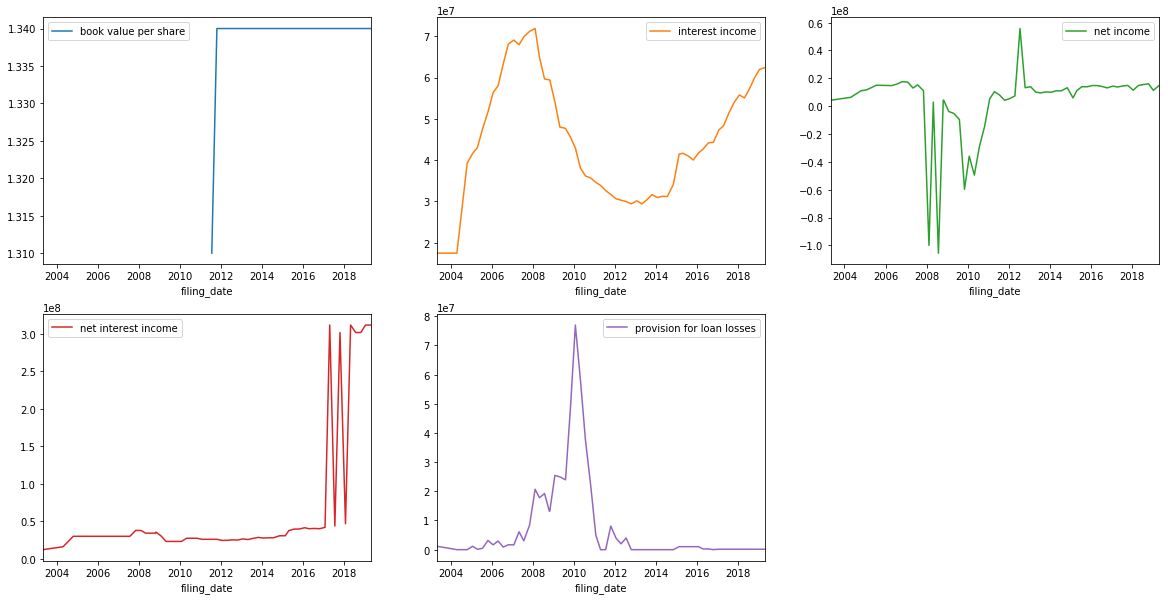

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001109242 book value per share       2003Q1 to 2011Q1: 33 periods  missing   
           book value per share       2011Q4 to 2019Q1: 30 periods  missing   
           interest income             2003Q2 to 2004Q2: 5 periods  missing   
           net income                  2003Q2 to 2003Q4: 3 periods  missing   
           net income                                       2004Q2  missing   
           net interest income         2003Q2 to 2003Q4: 3 periods  missing   
           net interest income                              2004Q2  missing   
           net interest income        2004Q4 to 2007Q2: 11 periods  missing   
           net interest income                              2008Q2  missing   
           net interest income         2009Q2 to 2009Q4: 3 periods  missing   
           net interest income         2010Q2 to 2010Q3: 2 periods  missing   
           net interest income         2011Q1 to 2011Q3: 3 periods  missing   
           net interest income                              2014Q4  missing   
           provision for loan losses   2003Q2 to 2003Q4: 3 periods  missing   
           provision for loan losses                        2004Q2  missing   
           provision for loan losses   2014Q1 to 2014Q3: 3 periods  missing   
           provision for loan losses   2015Q1 to 2015Q4: 4 periods  missing   
           provision for loan losses   2017Q1 to 2019Q1: 9 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001109242 book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()